In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [ ]:
# Transform the data to normalize it and convert it to a tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and test datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader wraps an iterable over our dataset with automatic batching, shuffling, etc.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


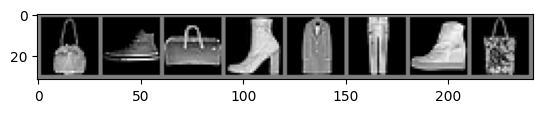

Bag Sneaker Bag Ankle boot Coat Trouser Ankle boot Bag


In [ ]:
# Data Visualisation
import matplotlib.pyplot as plt
import numpy as np
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    np_img = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Transpose the dimensions to (H x W x C)
    plt.show()

# Get a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images

# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image to a vector of 28*28=784
        x = self.fc1(x)  # Pass through the first layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass through the second layer
        return x

# Instantiate the model
input_size = 784  # 28x28 pixels
hidden_size = 512
num_classes = 10  # 10 classes for the different clothing types
model = SimpleNN(input_size, hidden_size, num_classes)


In [ ]:
print(model)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.2362
Epoch [2/5], Loss: 0.6056
Epoch [3/5], Loss: 0.3285
Epoch [4/5], Loss: 0.2706
Epoch [5/5], Loss: 0.2122


In [ ]:
# Evaluate the model
model.eval()  # Set model to evaluation mode (no gradient computation)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on test data: {100 * correct / total:.2f}%')


Accuracy on test data: 85.98%
